<a href="https://colab.research.google.com/github/MateoPalacios512/TAM_2025_2/blob/main/Tarea3_TAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Tarea 3

**Nombre:** Mateo Palacios Lopez  
**Asignatura:** Teoria de Aprendizaje de Maquina  
**Fecha:** 11 de septiembre de 2025

###EJERCICIO EN CLASE


In [ ]:
from sklearn.datasets import make_regression
N = 1000 # # samples
P = 20 # # features
X, y = make_regression(n_samples=N, n_features=P, noise=1, random_state=42)
print(X.shape,y.shape)

(1000, 20) (1000,)


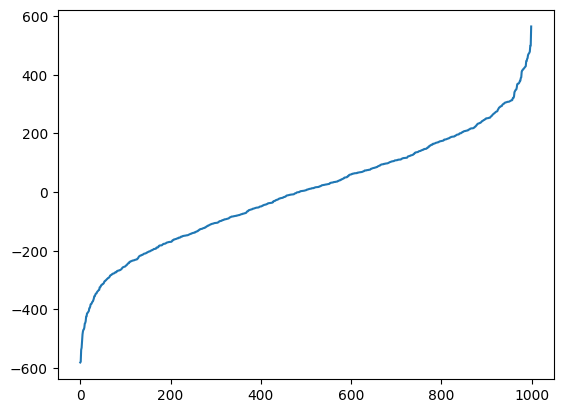

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.sort(y))
plt.show()

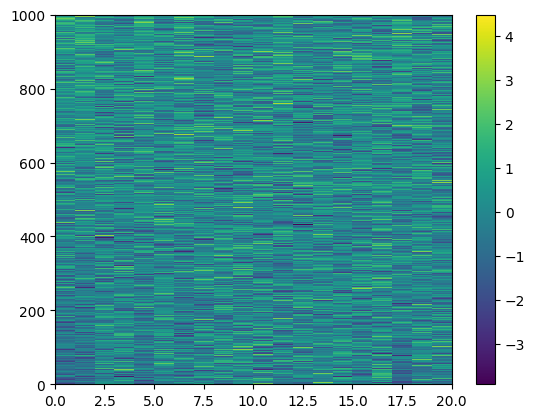

In [ ]:
ind_ = np.argsort(y)
plt.pcolormesh(X[ind_])
plt.colorbar()
plt.show()

In [ ]:
def mincua_reg(X,y,lam_ = 1e-3): #fit, opt
  alpha = np.linalg.inv(X.T.dot(X)+lam_*np.eye(X.shape[1])).dot(X.T).dot(y)
  return alpha

[ 7.99999269e+01  9.86015897e+01  5.57286288e+00  2.41760761e-02
  8.64704289e+01 -3.94575875e-02  6.94411862e+01 -3.56275838e-03
  2.38619256e-02 -3.12145636e-02  1.86214575e+01  3.96564254e+01
  4.91812853e-03  3.10939044e+00 -4.42071056e-02  2.63860334e+01
 -2.41981026e-02  8.68971640e+01  3.51245931e-02  1.62243894e-02]


<StemContainer object of 3 artists>

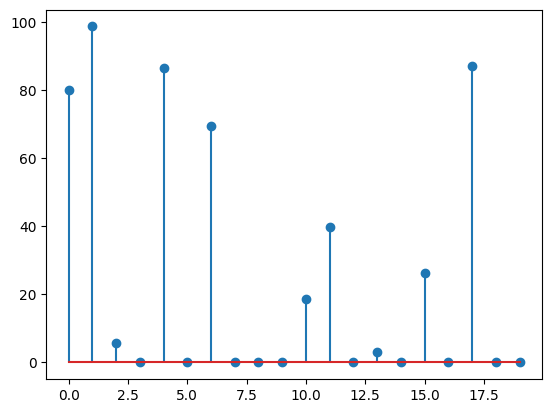

In [ ]:
alpha = mincua_reg(X,y)
print(alpha)
plt.stem(np.arange(len(alpha)),np.abs(alpha))

In [ ]:
ypred = X.dot(alpha)

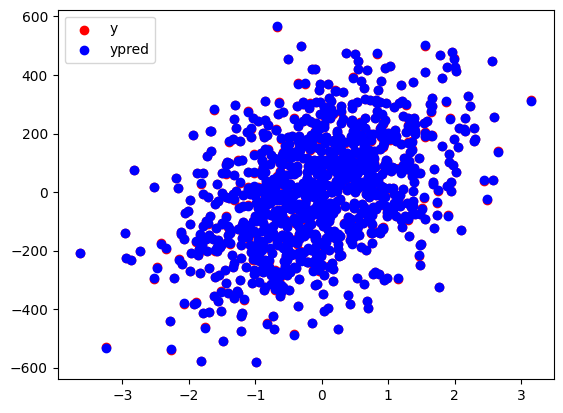

In [ ]:
plt.scatter(X[ind_,0],y[ind_],c='r',marker='o',label='y')
plt.scatter(X[ind_,0],ypred[ind_],c='b',label='ypred')
plt.legend()
plt.show()


In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names[0:6])

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


(20640, 8) (20640,)


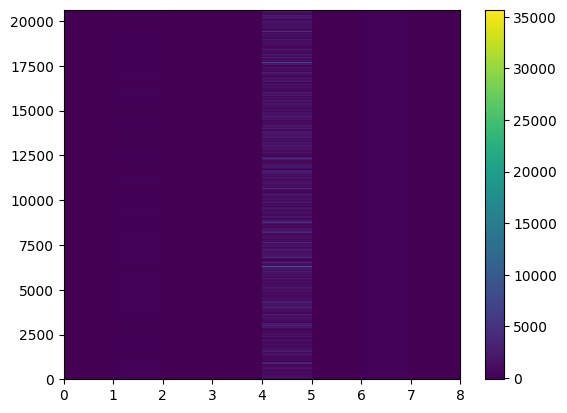

In [ ]:
X = housing.data
y = housing.target
print(X.shape,y.shape)
plt.pcolormesh(X)
plt.colorbar()
plt.show()

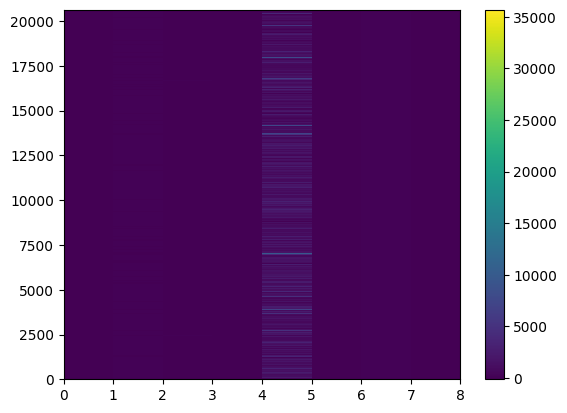

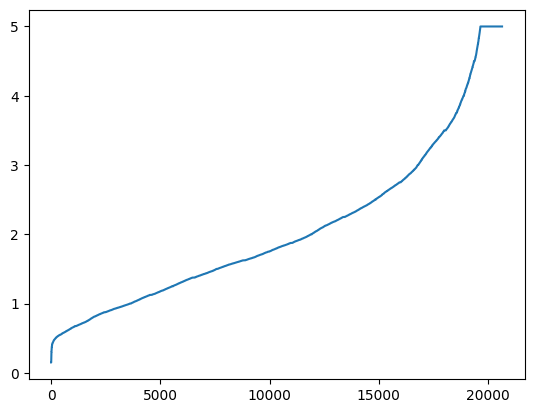

In [ ]:
ind_ = np.argsort(y)
plt.pcolormesh(X[ind_])
plt.colorbar()
plt.show()
plt.plot(y[ind_])
plt.show()

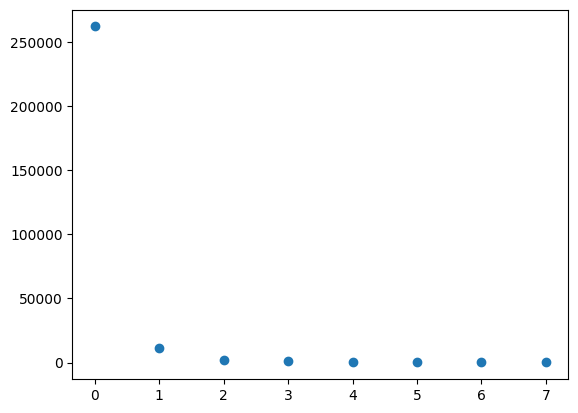

In [ ]:
U,S,Vh = np.linalg.svd(X)
plt.scatter(np.arange(len(S)),S)
plt.show()

###TAREA: Hacerlo por gradientes

(1000, 20) (1000,)


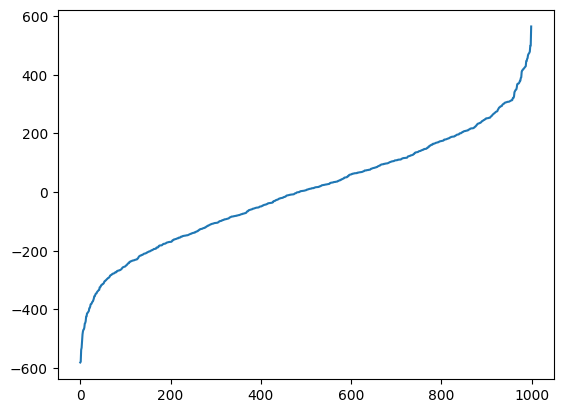

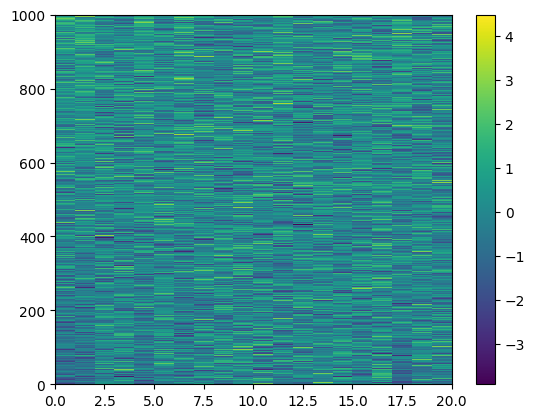

[ 7.95408694e+01  9.75540264e+01  5.47791528e+00  1.78327815e-01
  8.56749173e+01 -1.21286789e-01  6.87419791e+01 -6.04784811e-03
 -2.42166702e-01  8.85129376e-02  1.83177866e+01  3.93591590e+01
  2.90034508e-02  2.79051629e+00 -1.24341231e-01  2.63928584e+01
 -3.39128361e-01  8.60209920e+01  7.88997556e-02  9.42250043e-03]


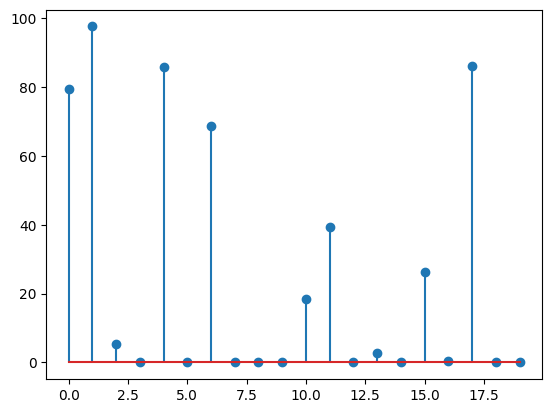

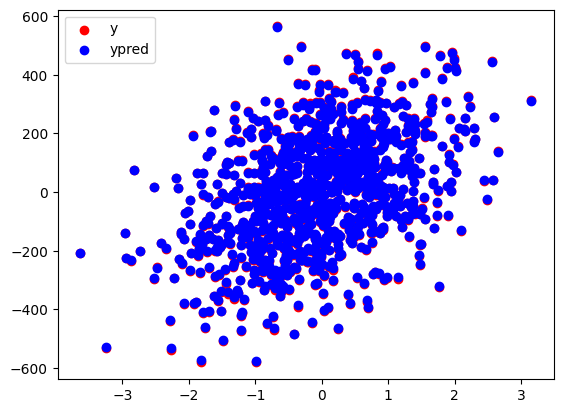

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


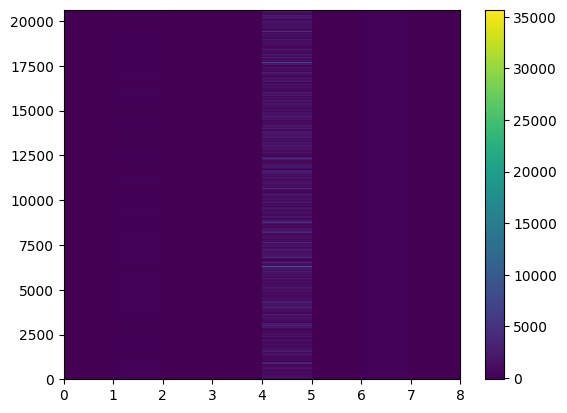

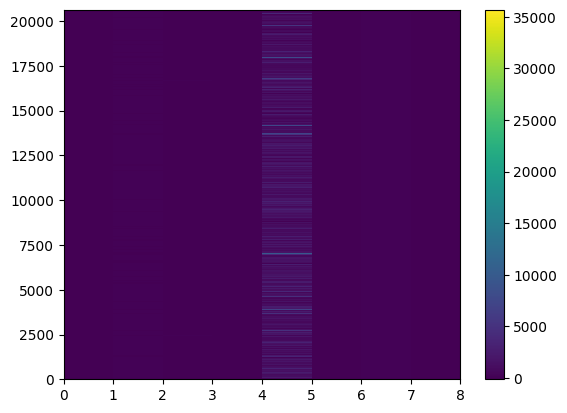

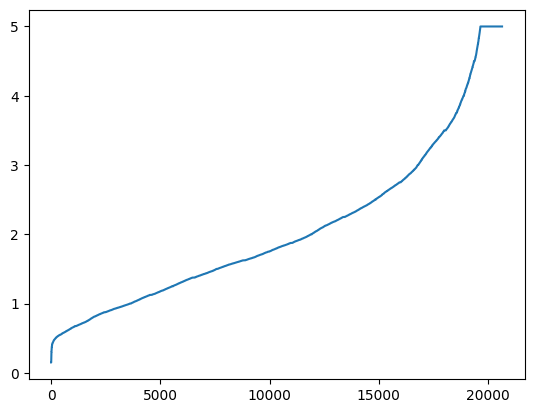

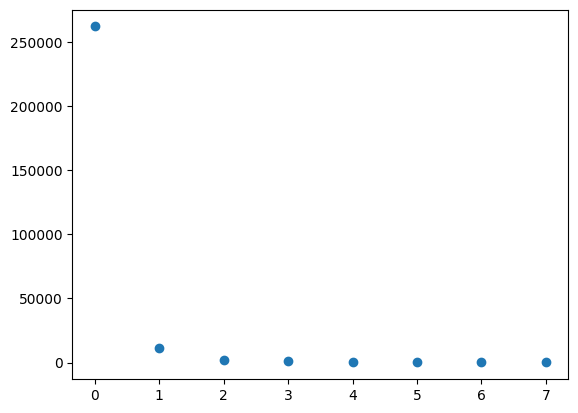

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, fetch_california_housing

# --------------------------
# 1. Generar datos sintéticos
# --------------------------
N, P = 1000, 20
X, y = make_regression(n_samples=N, n_features=P, noise=1, random_state=42)

print(X.shape, y.shape)

# Visualizaciones iniciales
plt.plot(np.sort(y))
plt.show()

ind_ = np.argsort(y)
plt.pcolormesh(X[ind_])
plt.colorbar()
plt.show()

# --------------------------
# 2. Regresión con gradiente descendente
# --------------------------
def gradiente_reg(X, y, lr=1e-3, epochs=5000, lam=1e-3):
    N, P = X.shape
    alpha = np.zeros(P)  # inicialización en ceros

    for _ in range(epochs):
        ypred = X.dot(alpha)
        grad = (1/N) * (X.T.dot(ypred - y)) + lam * alpha
        alpha -= lr * grad
    return alpha

alpha = gradiente_reg(X, y)
print(alpha)

# Coeficientes
plt.stem(np.arange(len(alpha)), np.abs(alpha))
plt.show()

# --------------------------
# 3. Predicciones
# --------------------------
ypred = X.dot(alpha)

plt.scatter(X[ind_,0], y[ind_], c='r', marker='o', label='y')
plt.scatter(X[ind_,0], ypred[ind_], c='b', label='ypred')
plt.legend()
plt.show()

# --------------------------
# 4. Dataset real: California Housing
# --------------------------
housing = fetch_california_housing()
X = housing.data
y = housing.target
print(X.shape, y.shape)
print(housing.feature_names[0:6])

# Visualizar datos
plt.pcolormesh(X)
plt.colorbar()
plt.show()

ind_ = np.argsort(y)
plt.pcolormesh(X[ind_])
plt.colorbar()
plt.show()

plt.plot(y[ind_])
plt.show()

# --------------------------
# 5. Análisis con SVD
# --------------------------
U, S, Vh = np.linalg.svd(X)
plt.scatter(np.arange(len(S)), S)
plt.show()
